# Introduction to the data set
In this project based on dataquest.io, we will explore a data set that contains information on various cars. This data can be found [here](https://archive.ics.uci.edu/ml/datasets/automobile) and we will use it to study the fundamentals of machine learing.

In this section, we will import the data set and filter those colums that have continuous values(numbers).

In [1]:
import pandas as pd
import numpy as np

In [2]:
columns =['symboling','normalized_losses','make','fuel_type','aspiration','num_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']

In [3]:
# Data set does have header, so we can create one by adding 'names' parameter in pandas.read_csv() function 
cars = pd.read_csv("imports-85.data", names=columns)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# Select only the columns with numberic values
is_number = ['normalized_losses','wheel_base','length','width','height','curb_weight','engine_size','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
numeric = cars[is_number]
numeric.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning 
In this part, we will replace the missing values(represented as '?') on the table to NaN values because the DataFrame can deal better with NaN. Then, we will normalize the values in the table.

In [5]:
numeric = numeric.replace('?',np.nan)
numeric.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
numeric = numeric.astype(float)

# Check how many NULL values each row has
numeric.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [7]:
# Drop the rows that have NULL values in the 'price' column (target column)
numeric = numeric.dropna(subset=['price'])
numeric.isnull().sum()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [8]:
# Replace the NULL values by the mean of the column
numeric = numeric.fillna(numeric.mean())
numeric.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [9]:
# Normalize the columns to [0, 1] range
price = numeric['price']
numeric = (numeric - numeric.min()) / (numeric.max() - numeric.min())
numeric['price'] = price

## Univariate Model

In this secton, we will make predictions over the data set using univariate k-nearest neightbors model.

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(column, target, data):
    knn = KNeighborsRegressor()
    
    # Permute the rows of the data
    np.random.seed(1)
    new_indexes = np.random.permutation(data.index)
    data = data.reindex(new_indexes)

    # Divide the set into training set and testing set
    mid = int(len(data) / 2)
    train = data.iloc[:mid]
    test = data.iloc[mid:]
    
    # Train the data set
    knn.fit(train[column], train[target])
    
    # Make the predictions in the test set
    predictions = knn.predict(test[column])
    
    # Calculate MSE(Mean Squared Error)
    mse = mean_squared_error(test[target], predictions)
    
    rmse = np.sqrt(mse)
    
    return rmse

rmse_column = {}

train_columns = numeric.columns.drop('price')

for column in train_columns:
    feature = [column]
    rmse_column[column] = knn_train_test(feature,'price',numeric)
    
rmse_column = pd.Series(rmse_column)
rmse_column.sort_values()

engine_size          3238.462830
horsepower           4037.037713
curb_weight          4401.118255
highway_mpg          4630.026799
width                4704.482590
city_mpg             4766.422505
length               5427.200961
wheel_base           5461.553998
compression_ratio    6610.812153
bore                 6780.627785
normalized_losses    7330.197653
peak_rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In [11]:
# Adapting the knn_train_test() function to accept the k parameter

def knn_train_test(column, target, data, k):
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Permute the rows of the data
    np.random.seed(1)
    new_indexes = np.random.permutation(data.index)
    data = data.reindex(new_indexes)

    # Divide the set into training set and testing set
    mid = int(len(data) / 2)
    train = data.iloc[:mid]
    test = data.iloc[mid:]
    
    # Train the data set
    knn.fit(train[column], train[target])
    
    # Make the predictions in the test set
    predictions = knn.predict(test[column])
    
    # Calculate MSE(Mean Squared Error)
    mse = mean_squared_error(test[target], predictions)
    
    rmse = np.sqrt(mse)
    
    return rmse

train_columns = numeric.columns.drop('price')
k_values = [1,3,5,7,9]

rmse_column = {}

for column in train_columns:
    rmse_values = []
    feature = [column]
    for k in k_values:
        rmse_values.append(knn_train_test(feature, 'price', numeric, k))
    rmse_column[column] = rmse_values

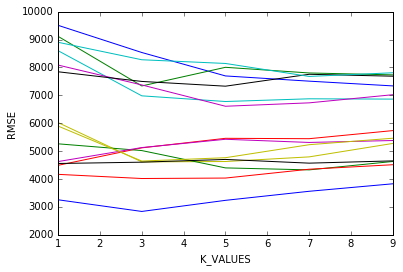

In [12]:
# Plotting the graph to visualize the results 

import matplotlib.pyplot as plt 
%matplotlib inline

for k, rmse in rmse_column.items():
    x = list(k_values)
    y = list(rmse)
    plt.plot(x, y)

plt.ylabel("RMSE")
plt.xlabel("K_VALUES")
plt.show()

## Multivariate Model
Let's adapt the last part to accept multiples columns.

In [13]:
# Testing all columns except price with defalut k value (k = 5)
train_columns = numeric.columns.drop('price')
RMSE_all_columns = knn_train_test(train_columns,'price',numeric,5)
print('RMSE_all_columns = ' + str(RMSE_all_columns))

RMSE_all_columns = 3726.63771831


In [14]:
# For each feature(column), let's find the average of the rmse values calculated for each k

avg_rmse = {}

for key, rmse in rmse_column.items():
    mean = np.mean(rmse)
    avg_rmse[key] = mean

avg_rmse = pd.Series(avg_rmse)
avg_rmse.sort_values()

engine_size          3346.484586
horsepower           4219.377860
width                4618.910560
curb_weight          4730.075815
highway_mpg          5069.469256
length               5176.394904
city_mpg             5202.409003
wheel_base           5252.392462
compression_ratio    7166.073599
bore                 7222.472445
normalized_losses    7624.407151
stroke               8000.240467
peak_rpm             8119.365233
height               8163.346266
dtype: float64

In [15]:
# Using the best 2 features from the avg_rmse to train and test a multivariate k-nearest neighbors model with default k value

features = ['engine_size', 'horsepower']
best_two_features = knn_train_test(features, 'price', numeric, 5)
print('best_two_features = ' + str(best_two_features))

best_two_features = 2949.88172772


In [16]:
# Using the best 3 features from the avg_rmse to train and test a multivariate k-nearest neighbors model with default k value

features = ['engine_size', 'horsepower', 'width']
best_three_features = knn_train_test(features, 'price', numeric, 5)
print('best_three_features = ' + str(best_three_features))

best_three_features = 3580.73766519


In [17]:
# Using the best 4 features from the avg_rmse to train and test a multivariate k-nearest neighbors model with default k value

features = ['engine_size', 'horsepower', 'width', 'curb_weight']
best_four_features = knn_train_test(features, 'price', numeric, 5)
print('best_four_features = ' + str(best_four_features))

best_four_features = 3487.34091733


In [18]:
# Using the best 5 features from the avg_rmse to train and test a multivariate k-nearest neighbors model with default k value

features = ['engine_size', 'horsepower', 'width', 'curb_weight', 'highway_mpg']
best_five_features = knn_train_test(features, 'price', numeric, 5)
print('best_five_features = ' + str(best_five_features))

best_five_features = 3410.21701339


## Hyperparameter Tuning
In this part, we will take best 3 models from last step, do the train and the test varying the hyperparameter(k value) from 1 to 25.

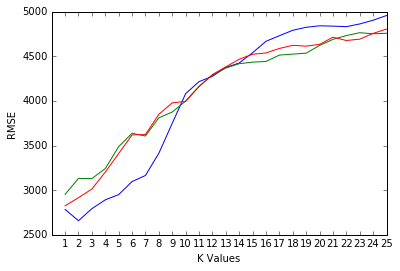

In [19]:
# From last step, the top 3 models are: best_two_features, best_four_features, best_five_features

k_values = range(1,26)

features_list = [['engine_size', 'horsepower'], ['engine_size', 'horsepower', 'width', 'curb_weight'], ['engine_size', 'horsepower', 'width', 'curb_weight', 'highway_mpg']]

for feat in features_list:
    rmse_values = []
    for k in k_values:
        rmse_values.append(knn_train_test(feat, 'price', numeric, k))
    plt.plot(k_values, rmse_values)
    
plt.xticks(k_values)
plt.xlabel("K Values")
plt.ylabel("RMSE")
plt.show()

### Findings
From the graph above, we see that the higher the hyperparameter, the higher is the RMSE value. A reason for this might be the high variance of the results in the tests.

## Next steps
- Modify the knn_train_test() function to use k-fold cross validation instead of test/train validation
- Modify the knn_train_test() function to perform the data cleaning as well